# TASK-2
# I201861 Shaheer Abdullah

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score,confusion_matrix
import tensorflow as tf  
from PIL import Image
import pandas as pd
import seaborn as sns
# Models from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
#GridSearchCV
from sklearn.model_selection import GridSearchCV

# Load and Pre-Process Data

In [6]:
#Reading the images.
import os

# Load and preprocess the data
data = []  # List to store image data
labels = []  # List to store labels

# Define a function to extract the person label from the file name
def extract_person_label(file_name):
    return int(file_name.split('.')[0].replace('subject', '')) - 1  # Subtract 1 to make labels start from 0

# Load data and labels
# Assuming the dataset files are in the 'dataset' directory
dataset_dir = 'E:\\archive (1)\\data'

for file_name in os.listdir(dataset_dir):
    img = plt.imread(os.path.join(dataset_dir, file_name))
    data.append(img.flatten())  # Flatten image into a 1D array
    labels.append(extract_person_label(file_name))

In [7]:
data = np.array(data)
labels = np.array(labels)

# Splitting the Data into Train and Test

In [8]:
#Setting up the random state
np.random.seed(42)
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.2)

In [9]:
print(f"The Training splits are : ({len(X_train)},{len(Y_train)})")
print(f"The Testing splits are : ({len(X_test)},{len(Y_test)})")

The Training splits are : (132,132)
The Testing splits are : (33,33)


# Fitting the Model

In [99]:
#Fitting the models.

model1 = RandomForestClassifier();
model2 = MLPClassifier(hidden_layer_sizes=(120, 120), activation='relu', solver='adam', max_iter=1000);

np.random.seed(42)
model1.fit(X_train, Y_train)
model2.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(120, 120), max_iter=1000)

# Score on the given Models

In [103]:
#Scores of the models.
RandomForest=model1.score(X_test,Y_test)
MLP_Classifier=model2.score(X_test,Y_test)
model_scores={
              "Random Forest Classifier": RandomForest,
              "MLP Classifier": MLP_Classifier
             }
model_scores

{'Random Forest Classifier': 1.0, 'MLP Classifier': 0.9090909090909091}

<Figure size 800x600 with 0 Axes>

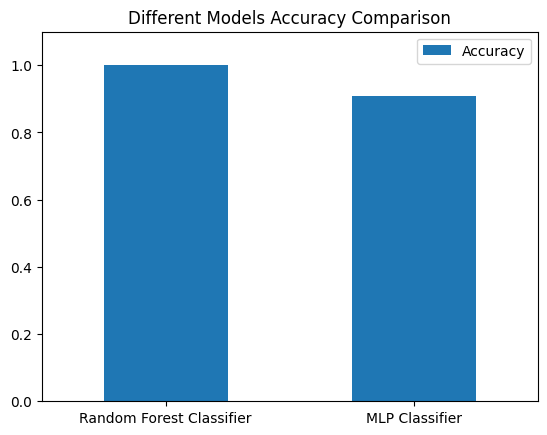

In [104]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
# Create a bar plot
plt.figure(figsize=(8, 6))
ax = model_compare.T.plot.bar()
plt.ylim(0, 1.1)  # Set the Y-axis range to 0-1
plt.title('Different Models Accuracy Comparison')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

# Grid Search CV on MLP

In [91]:
param_grid = {
    'hidden_layer_sizes': [(110,110),(120,120)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam','sgd'],
    'max_iter':[1000,1100]
}

In [92]:
Model_grid = MLPClassifier(max_iter=1000, random_state=42)

In [93]:
grid_search = GridSearchCV(Model_grid, param_grid, cv=3, verbose=2, n_jobs=-1)

In [94]:
grid_search.fit(X_train,Y_train);

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [95]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (110, 110),
 'max_iter': 1000,
 'solver': 'adam'}

In [96]:
grid_search.score(X_test,Y_test)

0.8787878787878788

# Evaluating MLP on Different Metrices

In [105]:
y_pred=model2.predict(X_test)

In [106]:
y_pred

array([12, 10, 11,  5,  8,  2, 14,  4,  9, 13,  1,  8,  1,  6,  2,  2, 12,
        3, 13,  1,  6,  1,  1,  0,  8, 14,  8,  5, 12, 14, 12,  7,  5])

In [107]:
Y_test

array([12, 10, 11,  5,  8,  2, 14,  4,  9, 13,  1,  7,  1,  6,  2,  2, 12,
        9, 13,  1,  6,  1,  1,  0,  2, 14,  8,  5, 12, 14, 12,  7,  5])

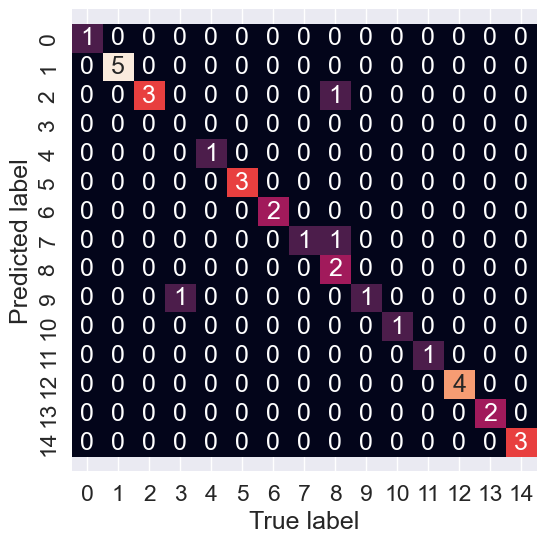

In [111]:
sns.set(font_scale=1.5)

def plot_conf_mat(Y_test, y_pred):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(confusion_matrix(Y_test, y_pred),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(Y_test, y_pred)

In [117]:
import warnings
warnings.filterwarnings("ignore")
#Metrices like accuracy, precision, f1, recall
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate and print precision
precision = precision_score(Y_test, y_pred, average='macro')
print(f"Precision: {precision:.2f}")

# Calculate and print F1 score
f1 = f1_score(Y_test,y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

recall = recall_score(Y_test, y_pred, average='macro')
print(f"Recall: {recall:.2f}")

Accuracy: 0.91
Precision: 0.90
F1 Score: 0.86
Recall: 0.85


<Figure size 400x300 with 0 Axes>

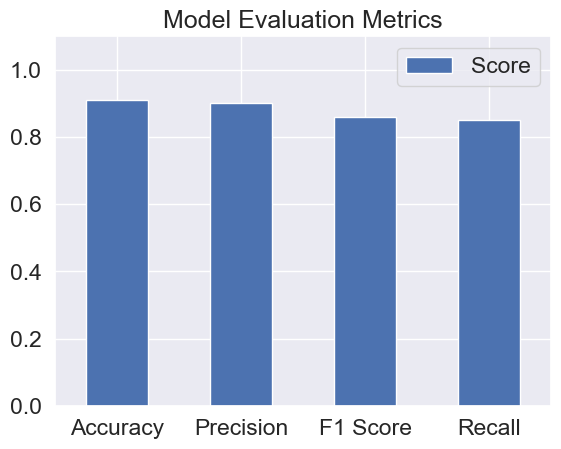

In [121]:
Metrics_dict={
              "Accuracy": 0.91,
              "Precision": 0.90,
              "F1 Score": 0.86,
              "Recall": 0.85    
}
model_compare = pd.DataFrame(Metrics_dict, index=["Score"])
# Create a bar plot
plt.figure(figsize=(4, 3));
ax = model_compare.T.plot.bar();
plt.ylim(0, 1.1)  # Set the Y-axis range to 0-1
plt.title('Model Evaluation Metrics')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show();

# Evaluating RandomForest on Different Metrices

In [116]:
y_preds=model.predict(X_test)

In [117]:
y_preds

array([12, 10, 11,  5,  8,  2, 14,  4,  9, 13,  1,  7,  1,  6,  2,  2, 12,
        9, 13,  1,  6,  1,  1,  0,  2, 14,  8,  5, 12, 14, 12,  7,  5])

In [118]:
Y_test

array([12, 10, 11,  5,  8,  2, 14,  4,  9, 13,  1,  7,  1,  6,  2,  2, 12,
        9, 13,  1,  6,  1,  1,  0,  2, 14,  8,  5, 12, 14, 12,  7,  5])

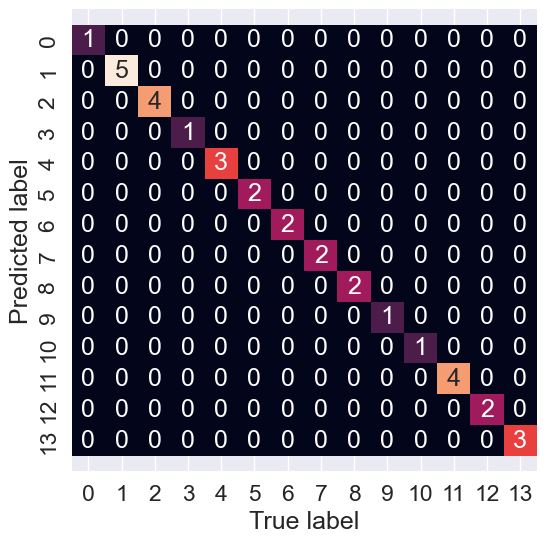

In [119]:
sns.set(font_scale=1.5)

def plot_conf_mat(Y_test, y_preds):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(confusion_matrix(Y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(Y_test, y_preds)

In [120]:
accuracy = accuracy_score(Y_test, y_preds)
print(f"Accuracy: {accuracy:.2f}")

# Calculate and print precision
precision = precision_score(Y_test, y_preds, average='macro')
print(f"Precision: {precision:.2f}")

# Calculate and print F1 score
f1 = f1_score(Y_test,y_preds, average='macro')
print(f"F1 Score: {f1:.2f}")

recall = recall_score(Y_test, Y_preds, average='macro')
print(f"Recall: {recall:.2f}")

Accuracy: 1.00
Precision: 1.00
F1 Score: 1.00
Recall: 1.00


<Figure size 400x300 with 0 Axes>

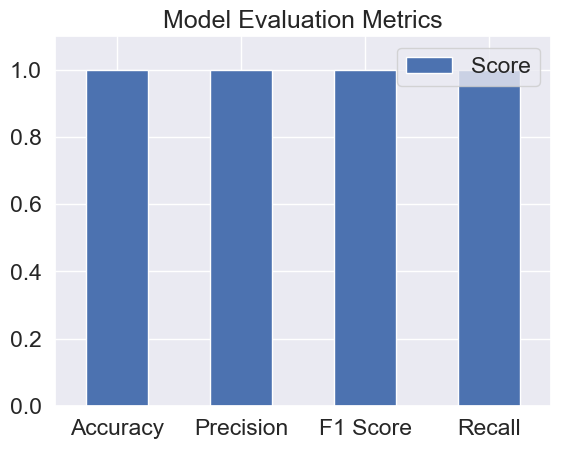

In [121]:
Metrics_dict={
              "Accuracy": 1.00,
              "Precision": 1.00,
              "F1 Score": 1.00,
              "Recall": 1.00    
}
model_compare = pd.DataFrame(Metrics_dict, index=["Score"])
# Create a bar plot
plt.figure(figsize=(4, 3))
ax = model_compare.T.plot.bar()
plt.ylim(0, 1.1)  # Set the Y-axis range to 0-1
plt.title('Model Evaluation Metrics')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()